### Importing data
#### Dataset at https://www.kaggle.com/datasets/ashx010/weather-patterns-and-trends

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('../dataset/weatherdata.csv')
df.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,1,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,3,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,4,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,5,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


### Basic preprocessing

In [19]:
# checking for na values
df.isna().sum()

Date                   0
Year                   0
Month                  0
Max Temperature        0
Avg Temperature        0
Min Temperature        0
Max Dew Point          0
Avg Dew Point          0
Min Dew Point          0
Max Humidity           0
Avg Humidity           0
Min Humidity           0
Max Wind Speed         0
Avg Wind Speed         0
Min Wind Speed         0
Max Pressure           0
Avg Pressure           0
Min Pressure           0
Total Precipitation    0
dtype: int64

In [20]:
df.isnull().sum()

Date                   0
Year                   0
Month                  0
Max Temperature        0
Avg Temperature        0
Min Temperature        0
Max Dew Point          0
Avg Dew Point          0
Min Dew Point          0
Max Humidity           0
Avg Humidity           0
Min Humidity           0
Max Wind Speed         0
Avg Wind Speed         0
Min Wind Speed         0
Max Pressure           0
Avg Pressure           0
Min Pressure           0
Total Precipitation    0
dtype: int64

In [ ]:
# Combine 'Year', 'Month', and 'Date' columns into a single string column and then convert it to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Date']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
df.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,2010-01-01,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2010-01-02,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,2010-01-03,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,2010-01-04,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,2010-01-05,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


In [29]:
# removing unwanted columns
df.drop(['Year', 'Month'], axis=1, inplace=True)
df.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,2010-01-01,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2010-01-02,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,2010-01-03,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,2010-01-04,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,2010-01-05,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


In [30]:
# Create a 'Temperature Range', 'dew point' range, etc feature
df['Temperature Range'] = df['Max Temperature'] - df['Min Temperature']
df['Dew Point Range'] = df['Max Dew Point'] - df['Min Dew Point']
df['Humidity Range'] = df['Max Humidity'] - df['Min Humidity']
df['Wind Speed Range'] = df['Max Wind Speed'] - df['Min Wind Speed']
df['Pressure Range'] = df['Max Pressure'] - df['Min Pressure']

In [31]:
df.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,Temperature Range,Dew Point Range,Humidity Range,Wind Speed Range,Pressure Range
0,2010-01-01,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,...,0.0,29.2,29.2,29.1,0.0,25.0,11.0,57.0,8.0,0.1
1,2010-01-02,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,...,3.0,29.3,29.3,29.2,0.0,13.0,8.0,23.0,5.0,0.1
2,2010-01-03,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,...,3.0,29.3,29.2,29.2,0.0,9.0,9.0,18.0,9.0,0.1
3,2010-01-04,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,...,7.0,29.3,29.2,29.1,0.0,7.0,2.0,23.0,8.0,0.2
4,2010-01-05,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,...,0.0,29.2,29.1,29.1,0.0,17.0,6.0,45.0,14.0,0.1


### Understanding dataset

In [36]:
df.head()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,Temperature Range,Dew Point Range,Humidity Range,Wind Speed Range,Pressure Range
0,2010-01-01,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,...,0.0,29.2,29.2,29.1,0.0,25.0,11.0,57.0,8.0,0.1
1,2010-01-02,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,...,3.0,29.3,29.3,29.2,0.0,13.0,8.0,23.0,5.0,0.1
2,2010-01-03,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,...,3.0,29.3,29.2,29.2,0.0,9.0,9.0,18.0,9.0,0.1
3,2010-01-04,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,...,7.0,29.3,29.2,29.1,0.0,7.0,2.0,23.0,8.0,0.2
4,2010-01-05,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,...,0.0,29.2,29.1,29.1,0.0,17.0,6.0,45.0,14.0,0.1


In [43]:
# checking the range, percentile,etc of data
df.describe()

,Date,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,...,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,Temperature Range,Dew Point Range,Humidity Range,Wind Speed Range,Pressure Range
count,5012,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000,...,5012.000000,5012.000000,5012.000000,5012.000000,5012.0,5012.000000,5012.000000,5012.000000,5012.000000,5012.000000
mean,2016-11-11 05:04:15.706305024,87.795690,77.604669,66.460295,64.845970,59.894214,53.117119,82.992019,60.846069,37.878292,...,0.889665,29.024162,28.939346,28.209178,0.0,21.335395,11.728851,45.113727,11.528731,0.814984
min,2010-01-01 00:00:00,48.000000,41.200000,0.000000,37.000000,25.700000,0.000000,19.000000,12.400000,0.000000,...,0.000000,28.500000,26.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-06-06 18:00:00,79.000000,66.175000,54.750000,55.000000,49.700000,43.000000,75.000000,47.900000,23.000000,...,0.000000,28.900000,28.800000,28.700000,0.0,15.000000,6.000000,33.000000,8.000000,0.100000
50%,2016-11-10 12:00:00,90.000000,81.600000,72.000000,63.000000,57.100000,52.000000,89.000000,62.300000,35.000000,...,0.000000,29.000000,28.900000,28.900000,0.0,21.000000,9.000000,44.000000,10.000000,0.100000
75%,2020-04-17 06:00:00,97.000000,87.700000,81.000000,77.000000,72.900000,68.000000,100.000000,75.500000,52.000000,...,0.000000,29.200000,29.100000,29.100000,0.0,25.000000,13.000000,57.000000,12.000000,0.200000
max,2023-09-24 00:00:00,162.000000,104.700000,95.000000,194.000000,82.500000,81.000000,100.000000,100.000000,100.000000,...,12.000000,29.900000,29.400000,29.300000,0.0,113.000000,149.000000,100.000000,690.000000,29.400000
std,NaN,13.241873,13.457093,16.837960,12.187823,12.697660,16.822315,18.586778,20.077181,20.215590,...,1.797800,0.198137,0.237664,4.423005,0.0,11.625047,10.882920,16.429400,16.218812,4.417714


#### Temperature flucations

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.dates import DateFormatter, MonthLocator

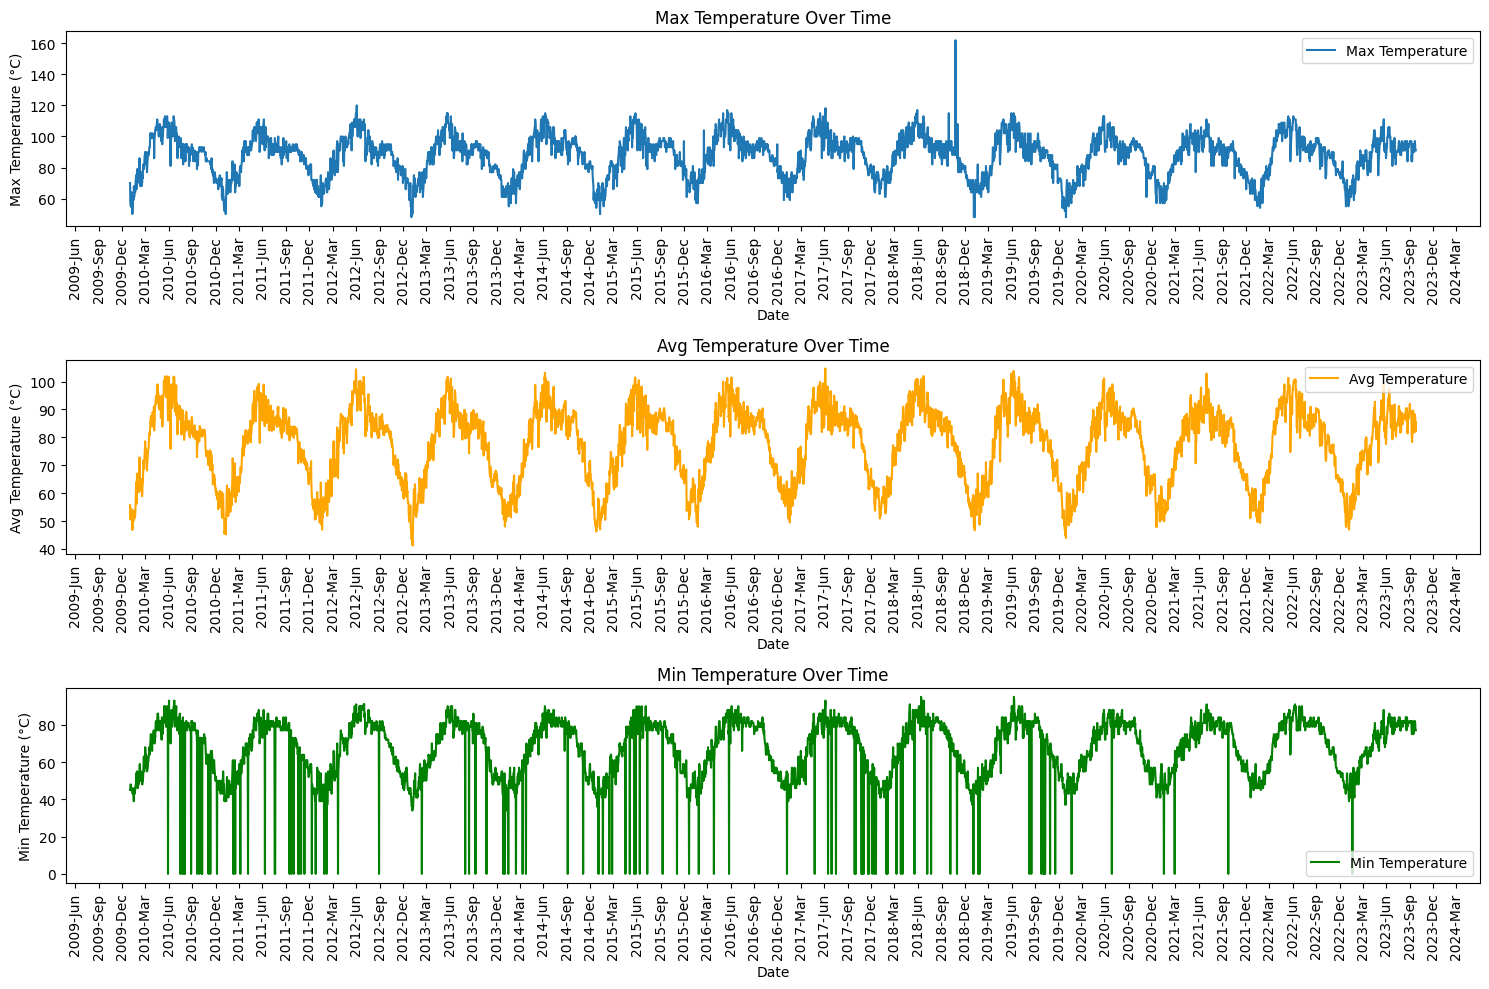

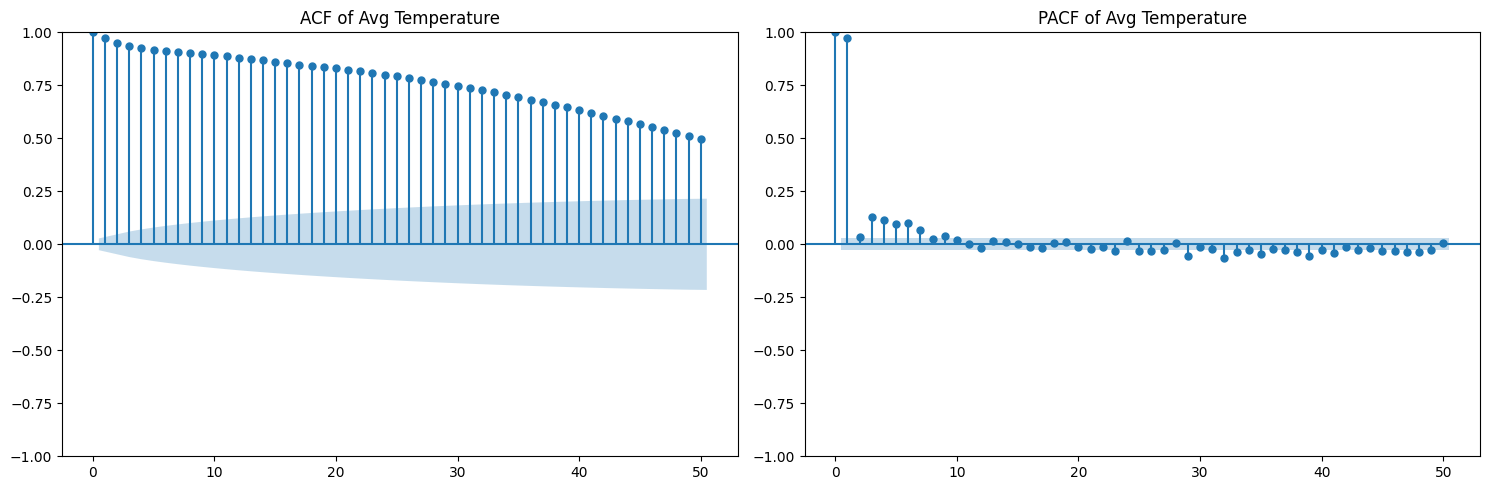

In [51]:
plt.figure(figsize=(15, 10))

# Plot Max Temperature
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Max Temperature'], label='Max Temperature')
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Avg Temperature
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Avg Temperature'], label='Avg Temperature', color='orange')
plt.title('Avg Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Min Temperature
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Min Temperature'], label='Min Temperature', color='green')
plt.title('Min Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Min Temperature (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot ACF and PACF for Avg Temperature
plt.figure(figsize=(15, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['Avg Temperature'], lags=50, ax=plt.gca())
plt.title('ACF of Avg Temperature')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['Avg Temperature'], lags=50, ax=plt.gca())
plt.title('PACF of Avg Temperature')

plt.tight_layout()
plt.show()

#### Dew Point fluc..

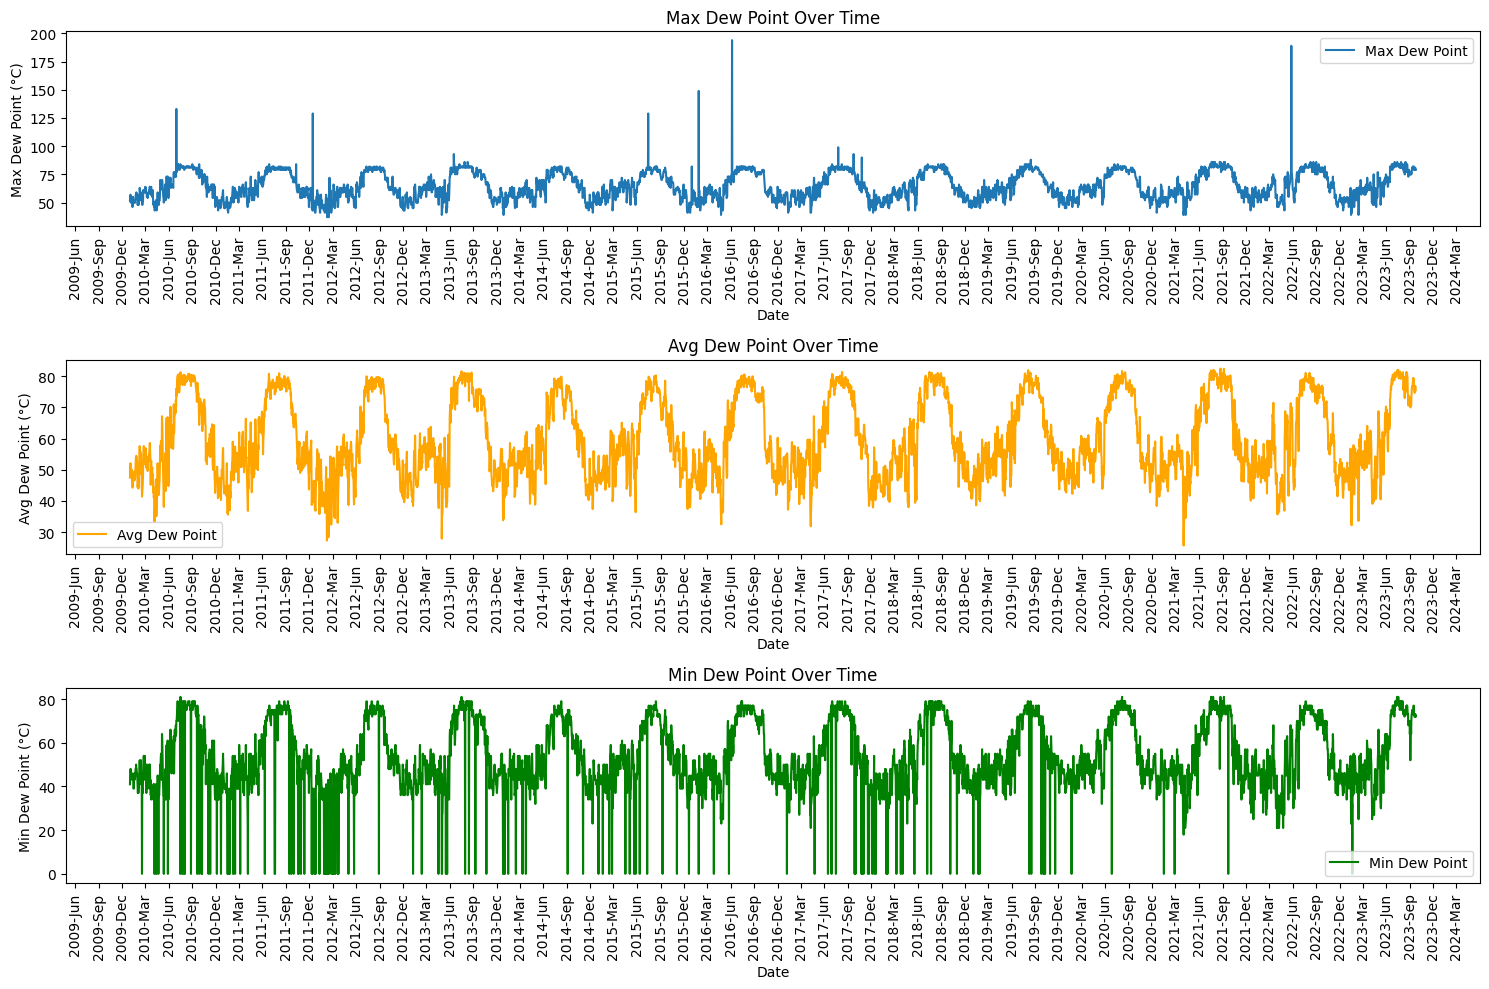

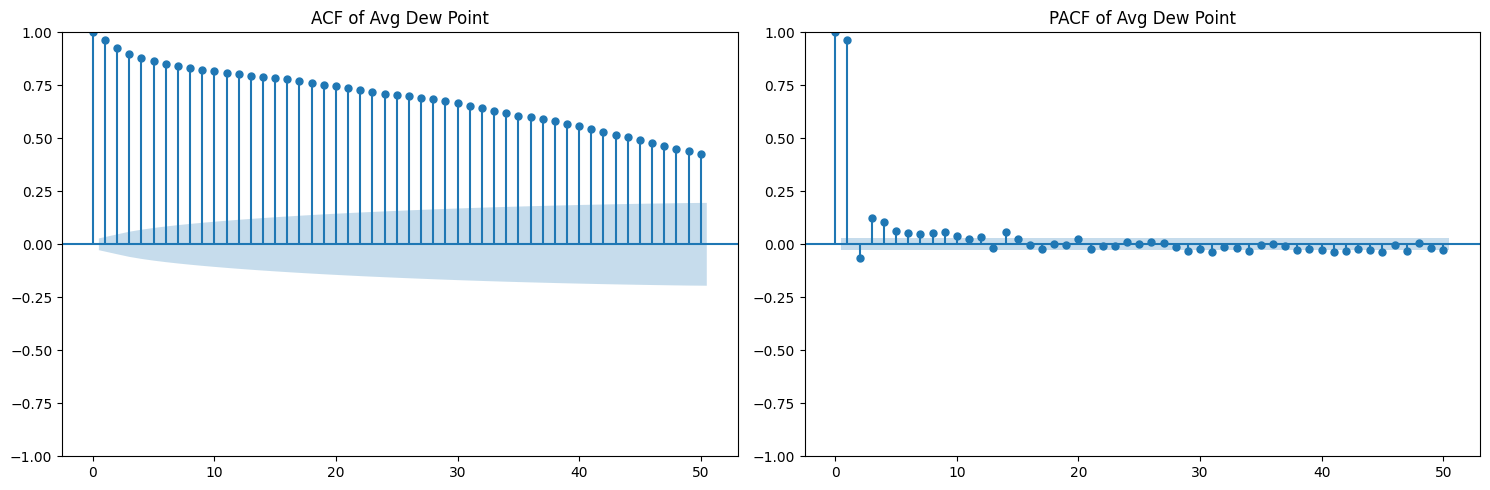

In [54]:
plt.figure(figsize=(15, 10))

# Plot Max Temperature
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Max Dew Point'], label='Max Dew Point')
plt.title('Max Dew Point Over Time')
plt.xlabel('Date')
plt.ylabel('Max Dew Point (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Avg Temperature
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Avg Dew Point'], label='Avg Dew Point', color='orange')
plt.title('Avg Dew Point Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Dew Point (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Min Temperature
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Min Dew Point'], label='Min Dew Point', color='green')
plt.title('Min Dew Point Over Time')
plt.xlabel('Date')
plt.ylabel('Min Dew Point (°C)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot ACF and PACF for Avg Temperature
plt.figure(figsize=(15, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['Avg Dew Point'], lags=50, ax=plt.gca())
plt.title('ACF of Avg Dew Point')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['Avg Dew Point'], lags=50, ax=plt.gca())
plt.title('PACF of Avg Dew Point')

plt.tight_layout()
plt.show()

#### Humidity fluc..

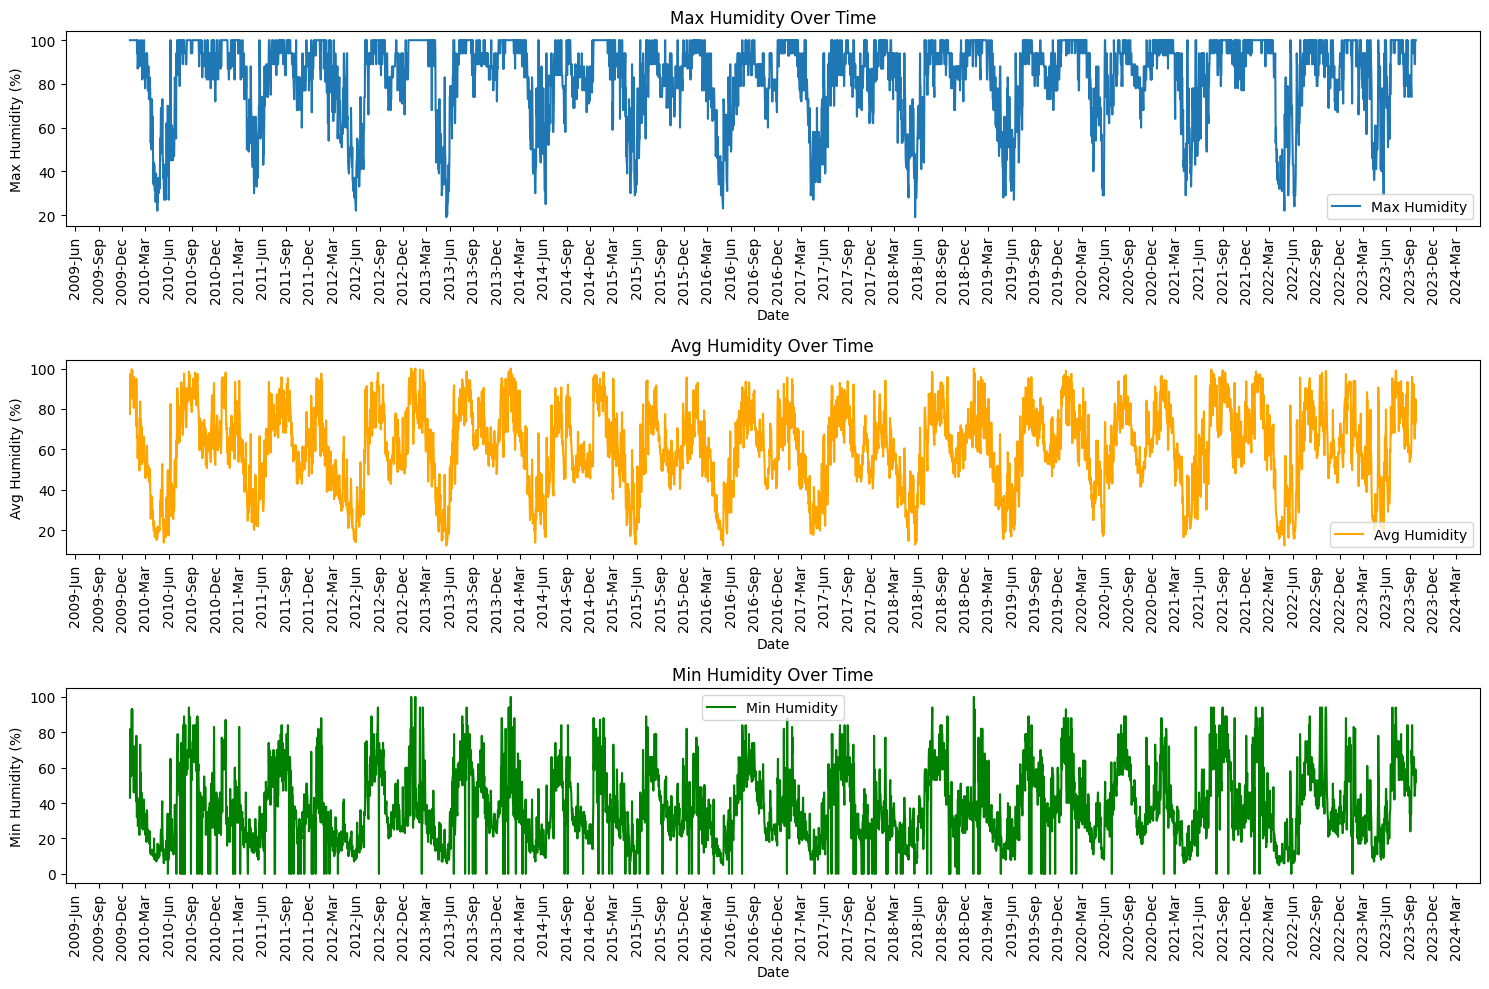

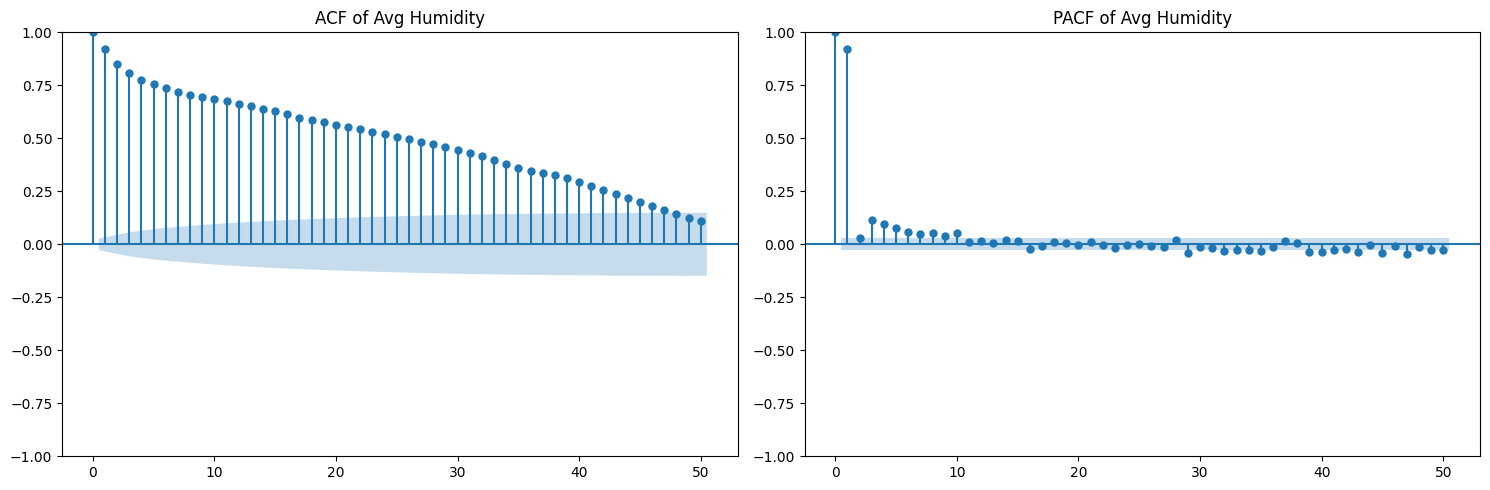

In [55]:
plt.figure(figsize=(15, 10))

# Plot Max Humidity
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Max Humidity'], label='Max Humidity')
plt.title('Max Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Max Humidity (%)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Avg Temperature
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Avg Humidity'], label='Avg Humidity', color='orange')
plt.title('Avg Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Humidity (%)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Min Temperature
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Min Humidity'], label='Min Humidity', color='green')
plt.title('Min Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Min Humidity (%)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot ACF and PACF for Avg Temperature
plt.figure(figsize=(15, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['Avg Humidity'], lags=50, ax=plt.gca())
plt.title('ACF of Avg Humidity')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['Avg Humidity'], lags=50, ax=plt.gca())
plt.title('PACF of Avg Humidity')

plt.tight_layout()
plt.show()

#### Wind Speed fluc..

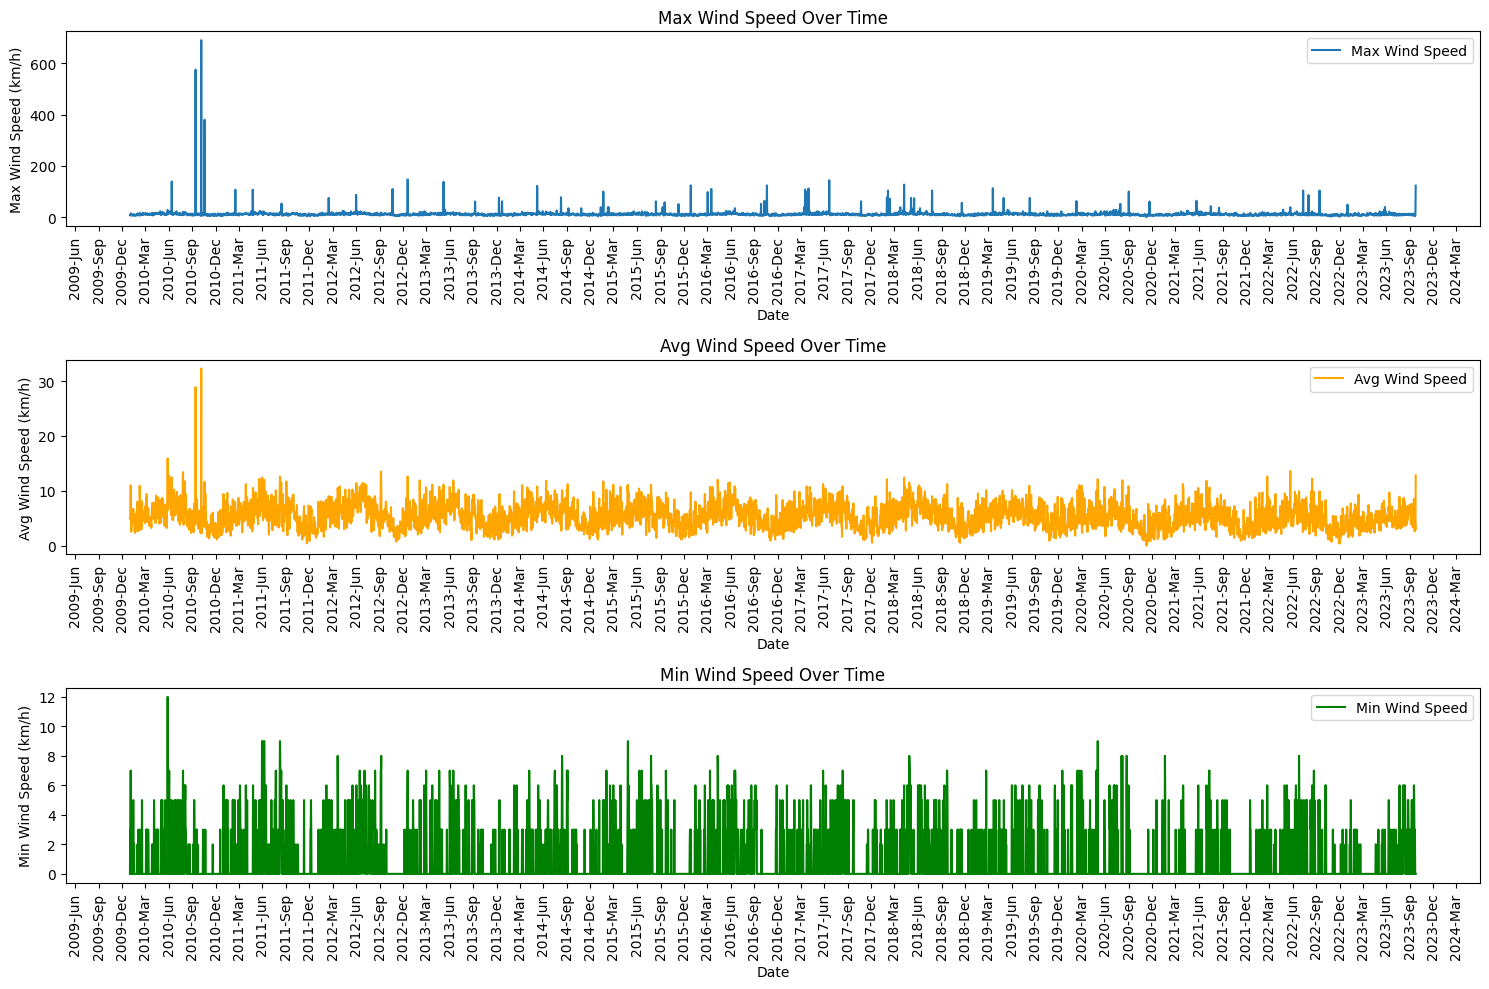

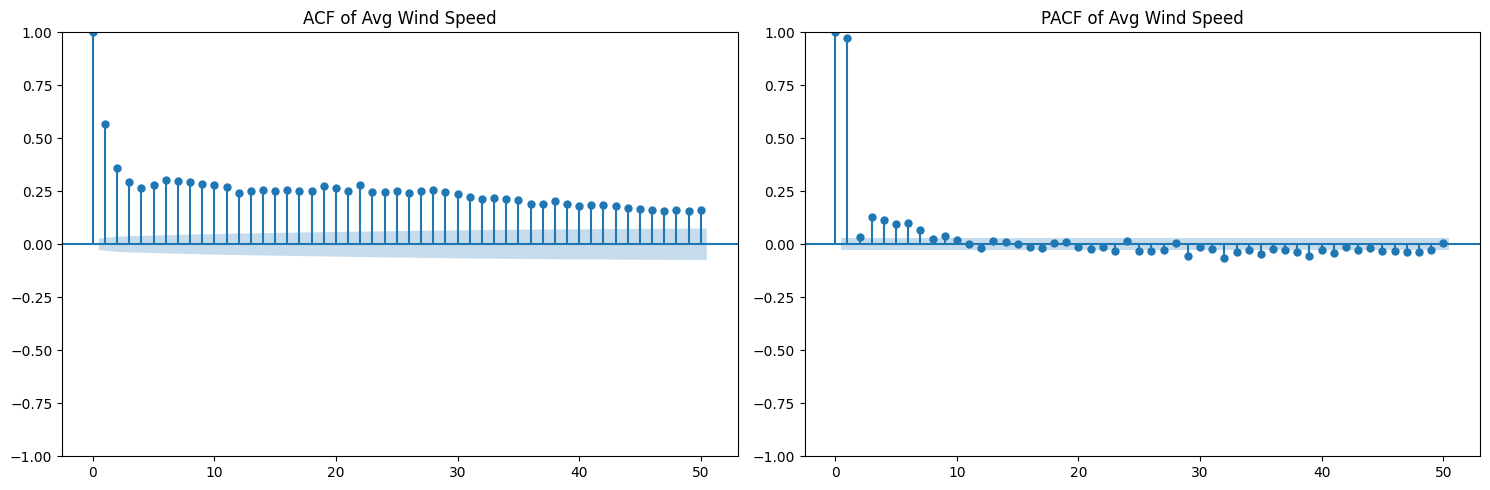

In [56]:
plt.figure(figsize=(15, 10))

# Plot Max Wind Speed
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Max Wind Speed'], label='Max Wind Speed')
plt.title('Max Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Max Wind Speed (km/h)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Avg Wind Speed
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Avg Wind Speed'], label='Avg Wind Speed', color='orange')
plt.title('Avg Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Wind Speed (km/h)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Min Wind Speed
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Min Wind Speed'], label='Min Wind Speed', color='green')
plt.title('Min Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Min Wind Speed (km/h)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot ACF and PACF for Avg Temperature
plt.figure(figsize=(15, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['Avg Wind Speed'], lags=50, ax=plt.gca())
plt.title('ACF of Avg Wind Speed')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['Avg Temperature'], lags=50, ax=plt.gca())
plt.title('PACF of Avg Wind Speed')

plt.tight_layout()
plt.show()

#### Pressure fluc..

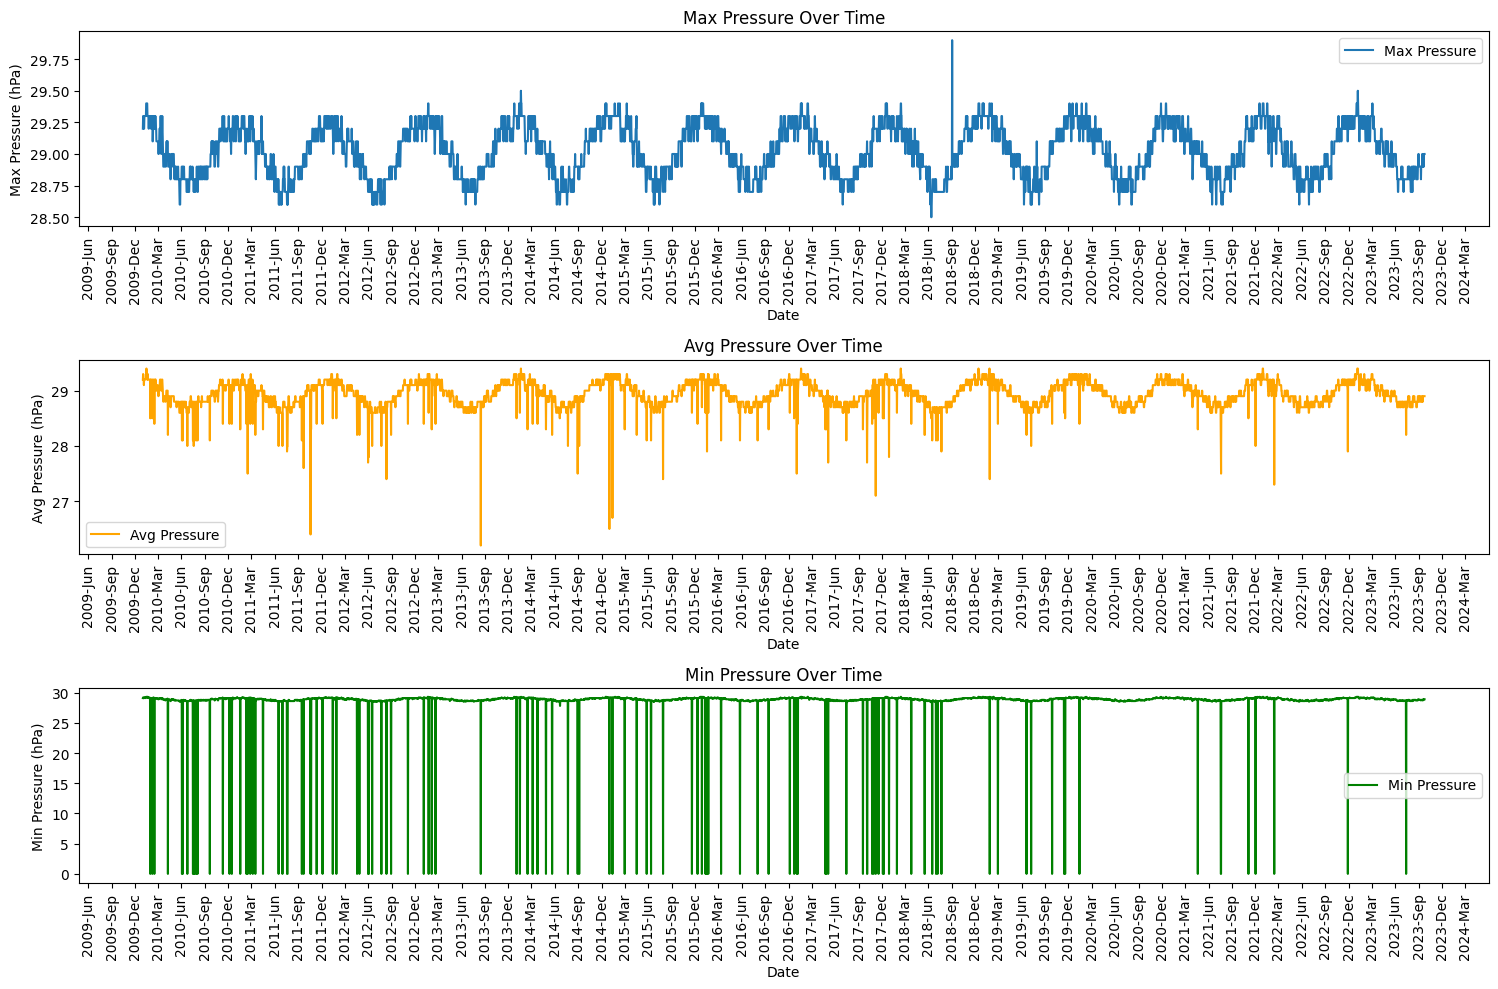

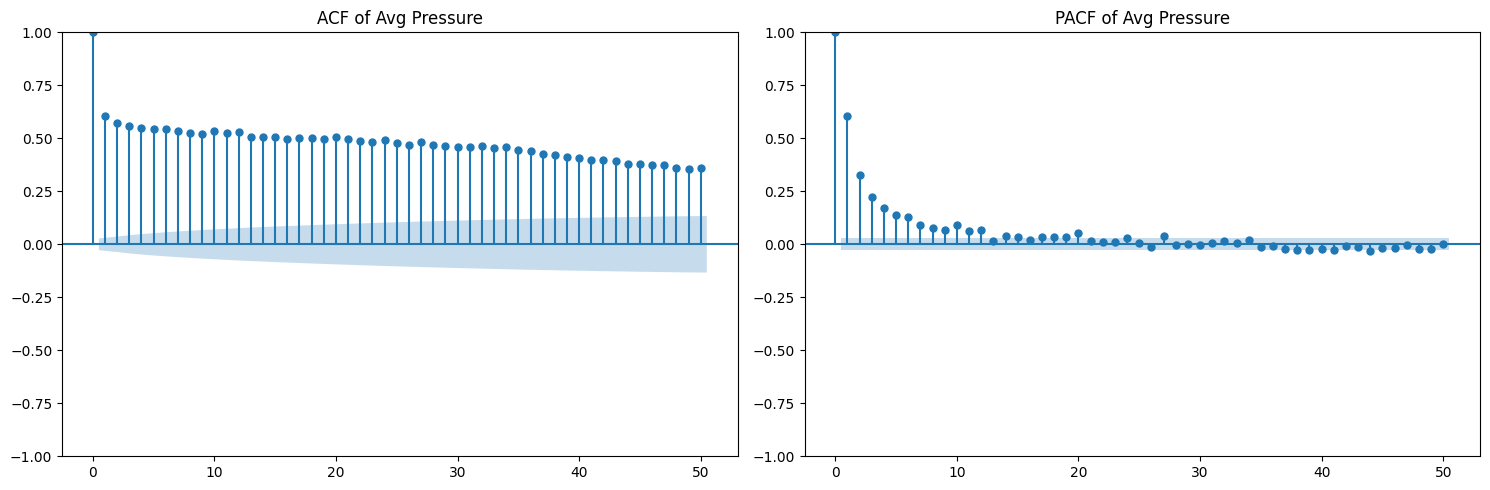

In [57]:
plt.figure(figsize=(15, 10))

# Plot Max Pressure
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Max Pressure'], label='Max Pressure')
plt.title('Max Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Max Pressure (hPa)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Avg Pressure
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Avg Pressure'], label='Avg Pressure', color='orange')
plt.title('Avg Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Pressure (hPa)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

# Plot Min Pressure
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Min Pressure'], label='Min Pressure', color='green')
plt.title('Min Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Min Pressure (hPa)')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Plot ACF and PACF for Avg Pressure
plt.figure(figsize=(15, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df['Avg Pressure'], lags=50, ax=plt.gca())
plt.title('ACF of Avg Pressure')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df['Avg Pressure'], lags=50, ax=plt.gca())
plt.title('PACF of Avg Pressure')

plt.tight_layout()
plt.show()

### Other preprocessing

In [52]:
## to do after train/test split

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['Max Temperature', 'Avg Temperature', 'Min Temperature']] = scaler.fit_transform(df[['Max Temperature', 'Avg Temperature', 'Min Temperature']])

### Saving dataset

In [59]:
df.to_csv('../dataset/weatherdata_cleaned.csv', index=False)

In [60]:
len(df)

5012